In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import convolve2d

In [2]:
img = mpimg.imread('lena.png')

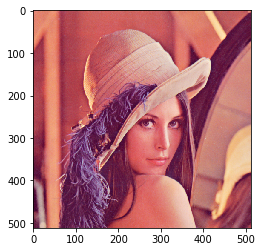

In [3]:
plt.imshow(img)
plt.show()

In [4]:
img.shape

(512, 512, 3)

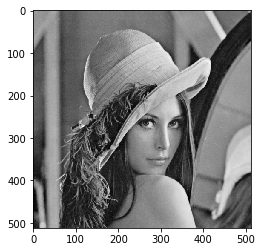

In [6]:
bw = img.mean(axis = 2)
plt.imshow(bw, cmap = 'gray')
plt.show()

In [7]:
W = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        dist = (i - 9.5) ** 2 + (j - 9.5) ** 2
        W[i, j] = np.exp(-dist / 50.)
        
W /= W.sum() 

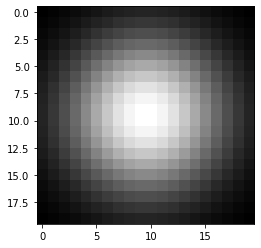

In [8]:
plt.imshow(W, cmap = 'gray')
plt.show()

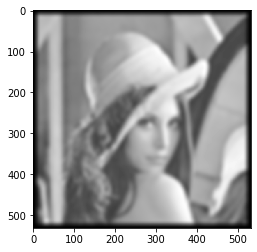

In [10]:
out = convolve2d(bw, W)
plt.imshow(out, cmap = 'gray')
plt.show()

In [11]:
print(out.shape)

(531, 531)


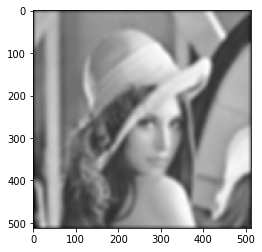

In [12]:
out = convolve2d(bw, W, mode = 'same')
plt.imshow(out, cmap = 'gray')
plt.show()

In [13]:
print(out.shape)

(512, 512)


In [14]:
out3 = np.zeros(img.shape)
print(out3.shape)

(512, 512, 3)


In [15]:
for i in range(3):
    out3[:,:,i] = convolve2d(img[:,:,i], W, mode = 'same')

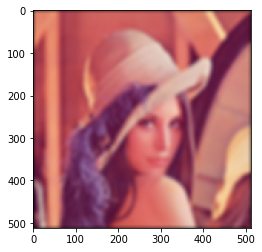

In [16]:
plt.imshow(out3)
plt.show()

In [21]:
#Edge detection

Hx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
], dtype = np.float32)

Hy = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
], dtype=np.float32)

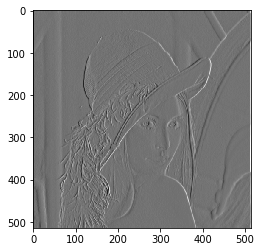

In [22]:
Gx = convolve2d(bw, Hx)
plt.imshow(Gx, cmap = 'gray')
plt.show()

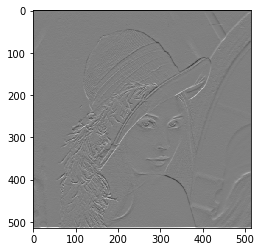

In [23]:
Gy = convolve2d(bw, Hy)
plt.imshow(Gy, cmap = 'gray')
plt.show()

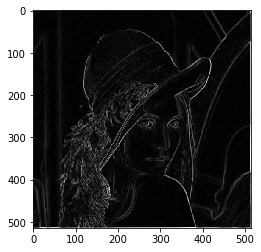

In [24]:
G = np.sqrt(Gx*Gx + Gy*Gy)
plt.imshow(G, cmap = 'gray')
plt.show()

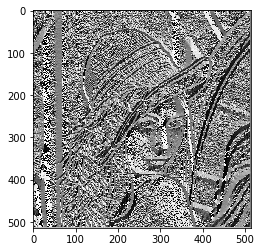

In [25]:
theta = np.arctan2(Gy, Gx)
plt.imshow(theta, cmap = 'gray')
plt.show()